## A Simple Tutorial For using QCAD

In [1]:
from QCAD import Module, QuantumCircuit, execute
from QCAD import TypicalModule as tm

import numpy as np

### 1. Definition of Module
- 이미 정의된 Module을 아래 나열하였습니다. </br> TypicalModule Class를 이용해 사용하시면 됩니다.

- tm.I, tm.H, tm.X, tm.Y, tm.Z, tm.CX, tm.CZ, tm.CCX, tm.CCZ, tm.RX, tm.RY, tm.RZ, tm.U, tm.MCU

- 이미 정의된 모듈을 재사용하여 새로운 모듈을 정의할 수 있습니다. </br> 이때 모듈의 PORT 순서를 변경할 수 있습니다.

In [2]:
rx_half_pi = tm.RX('RXpi/2', np.pi/2)

custom_u = tm.U('CUSTOMU', 1, [[-1, 0], [0, 1]])

multi_control_h = tm.MCU('CCH', 3, [0, 1], tm.H[2])

M = Module('M', 3, [tm.H[0],
                    custom_u[2],
                    multi_control_h[0, 1, 2]])

N = Module('N', 4, [tm.MCU('MCM', 4, [3], M[0, 1, 2])[0, 1, 2, 3],
                   tm.H[3]])

In [3]:
N.show()

for _temp_module, _temp_reg_index in zip(*N.typ_decompose()):
    print('----------------------')
    _temp_module.show()
    print(f'reg_index     :{_temp_reg_index}')

Name        :N
N           :4
sub_modules :[<QCAD.module.TypicalModule.MCU object at 0x7f624f9084e0>, <QCAD.module.Module object at 0x7f6278088ba8>]
reg_indices :[[0, 1, 2, 3], [3]]
typical     :False
contolled   :False
----------------------
Name        :MCM
N           :2
sub_modules :[<QCAD.module.Module object at 0x7f6278088ba8>]
reg_indices :[[1]]
typical     :True
contolled   :True
control_bits  :[0]
reg_index     :[3, 0]
----------------------
Name        :MCM
N           :2
sub_modules :[<QCAD.module.TypicalModule.U object at 0x7f624f908470>]
reg_indices :[[1]]
typical     :True
contolled   :True
control_bits  :[0]
reg_index     :[3, 2]
----------------------
Name        :MCM
N           :4
sub_modules :[<QCAD.module.Module object at 0x7f6278088ba8>]
reg_indices :[[3]]
typical     :True
contolled   :True
control_bits  :[0, 1, 2]
reg_index     :[3, 0, 1, 2]
----------------------
Name        :H
N           :1
sub_modules :[]
reg_indices :[]
typical     :True
contolled   :False
r

### 2. Quantum Circuit Description using Modules

Quantum Circuit은 사실상 하나의 큰 모듈과 같습니다. </br> 모듈을 정의한 뒤 이를 이용해 QC를 생성합니다.

In [4]:
qc = QuantumCircuit(N)

### 3. Simulation of Quantum Circuit with arbitrary initial state

[(0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j]


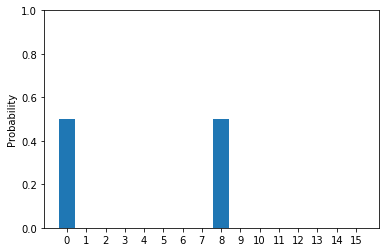

[(0.5+0j), 0j, (0.5+0j), 0j, 0j, 0j, 0j, 0j, (0.5+0j), 0j, (0.5+0j), 0j, 0j, 0j, 0j, 0j]


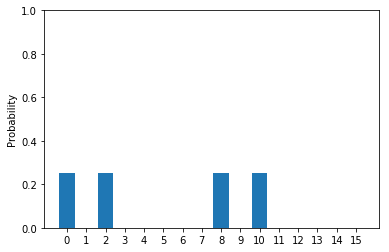

[(0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j]


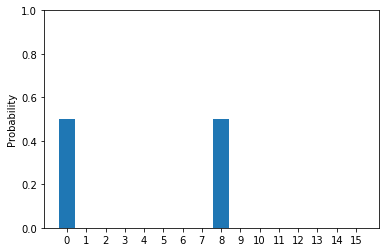

In [5]:
execute('MatrixModel', qc)
execute('MatrixModel', qc, [[1, 0], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0], [1, 0]])
execute('MatrixModel', qc, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 4. Simulation using C++ simulator

아직 제작 중입니다. 개발 완료된 부분과 개발 예정인 부분은 다음과 같습니다.

> ### 성능
> 랩톱 기준 (i5 4세대, 4GB RAM)
> 25qubit 1개 게이트 1초 정도 소요

> ### 현재 상태
> 1. ONLY single target gates
> 1. Results are on the console
> 1. Initial state = |0>

> ### 개발 예정 (~1/8)
> 1. CNOT gate
> 1. Arbitrary initial state
> 1. Running time measurement (Interface?)
> 1. Visualization using graphs, interaction with python output stream
> 1. Optimization for particular single gates Ex) X, Y ...

In [1]:
from QCAD import Module, QuantumCircuit, execute
from QCAD import TypicalModule as tm

import numpy as np

M = Module('M', 4, [tm.H[0],
                    tm.CX[1, 2]])
N = Module('N', 25, [M[3, 4, 5, 6]])

qc = QuantumCircuit(N)

execute('Cimulator', qc, option='NoPrint')